In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
fuel_report = pd.read_csv('fuel_ferc1.csv')
print(fuel_report.head(5))

                record_id  utility_id_ferc1  report_year  \
0   f1_fuel_1994_12_1_0_7                 1         1994   
1  f1_fuel_1994_12_1_0_10                 1         1994   
2   f1_fuel_1994_12_2_0_1                 2         1994   
3   f1_fuel_1994_12_2_0_7                 2         1994   
4  f1_fuel_1994_12_2_0_10                 2         1994   

       plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0              rockport                coal       ton        5377489.0   
1  rockport total plant                coal       ton       10486945.0   
2                gorgas                coal       ton        2978683.0   
3                 barry                coal       ton        3739484.0   
4             chickasaw                 gas       mcf          40533.0   

   fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
0               16.590                      18.59   
1               16.592                      18.58   
2               24.130             

In [12]:
fuel_report.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [15]:
fuel_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [16]:
fuel_report.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [17]:
fuel_report.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [26]:
fuel_report['fuel_unit'] = fuel_report['fuel_unit'].fillna(value='mcf')

In [27]:
fuel_report.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [96]:
fuel_year_coal = fuel_report.groupby(['fuel_type_code_pudl', 'report_year']).sum().iloc[0:25,:]
fuel_year_coal

utility_id_ferc1  fuel_qty_burned  \
fuel_type_code_pudl report_year                                      
coal                1994                    50430     7.172082e+08   
                    1995                    51231     1.257398e+09   
                    1996                    45720     6.988514e+08   
                    1997                    44254     8.169024e+08   
                    1998                    46403     8.982095e+08   
                    1999                    45126     8.805301e+08   
                    2000                    44271     8.620492e+08   
                    2001                    40232     8.564316e+08   
                    2002                    38592     8.144357e+08   
                    2003                    38876     8.018815e+08   
                    2004                    38246     7.735318e+08   
                    2005                    37923     6.046304e+08   
                    2006                    37535     6.002375e+08   
                    2007                    37444     6.131788e+08   
                    2008                    38487     5.752296e+08   
                    2009                    37503     5.219981e+08   
                    2010                    36877     5.931191e+08   
                    2011                    39557     5.228667e+08   
                    2012                    39453     4.833351e+08   
                    2013                    38759     5.001244e+08   
                    2014                    40106     4.571944e+08   
                    2015                    33587     3.878417e+08   
                    2016                    30469     3.804213e+08   
                    2017                    28995     3.297659e+08   
                    2018                    28278     3.216100e+08   

                                 fuel_mmbtu_per_unit  \
fuel_type_code_pudl report_year                        
coal                1994                10293.429297   
                    1995                10262.019015   
                    1996                 9269.878000   
                    1997                 9000.095755   
                    1998                 9212.781694   
                    1999                 9052.256583   
                    2000                 8584.171000   
                    2001                 7574.081578   
                    2002                 6967.923735   
                    2003                 6906.303079   
                    2004                 6677.321225   
                    2005                 6712.699417   
                    2006                 6770.056762   
                    2007                 6806.668782   
                    2008                 6577.120958   
                    2009                 6466.146698   
                    2010                 6420.927249   
                    2011                 6535.775560   
                    2012                 6595.084441   
                    2013                 6478.798444   
                    2014                 5932.994198   
                    2015                 5300.479998   
                    2016                 4652.271091   
                    2017                 4343.490065   
                    2018                 4066.708564   

                                 fuel_cost_per_unit_burned  \
fuel_type_code_pudl report_year                              
coal                1994                         14984.572   
                    1995                         14571.785   
                    1996                         12694.803   
                    1997                         43742.178   
                    1998                         11902.597   
                    1999                         16303.468   
                    2000                        100428.831   
                    2001                         15109.012   
         

In [104]:
fuel_report.groupby(['report_year', 'fuel_type_code_pudl']).sum().iloc[0:6,:]

utility_id_ferc1  fuel_qty_burned  \
report_year fuel_type_code_pudl                                      
1994        coal                            50430     7.172082e+08   
            gas                             54449     2.432212e+09   
            nuclear                          6643     2.069366e+08   
            oil                             14821     1.469716e+06   
            other                            1208     5.094458e+06   
            waste                            3508     1.242241e+06   

                                 fuel_mmbtu_per_unit  \
report_year fuel_type_code_pudl                        
1994        coal                        10293.429297   
            gas                           498.035534   
            nuclear                      1384.184311   
            oil                           960.537684   
            other                           1.287506   
            waste                           0.577288   

                                 fuel_cost_per_unit_burned  \
report_year fuel_type_code_pudl                              
1994        coal                                 14984.572   
            gas                                  10792.496   
            nuclear                             227983.354   
            oil                                   9362.194   
            other                                  116.737   
            waste                                   52.762   

                                 fuel_cost_per_unit_delivered  \
report_year fuel_type_code_pudl                                 
1994        coal                                    59215.371   
            gas                                      8099.070   
            nuclear                                  3483.492   
            oil                                      7622.838   
            other                                     117.148   
            waste                                      52.615   

                                 fuel_cost_per_mmbtu  
report_year fuel_type_code_pudl                       
1994        coal                           682.14697  
            gas                           1368.51941  
            nuclear                        136.53400  
            oil                           1147.21573  
            other                           27.97400  
            waste                          450.02700

In [97]:
fuel_year_coal.describe()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,25.000000,2.500000e+01,25.000000,25.00000,25.000000,25.000000
mean,39534.160000,6.507593e+08,7098.379328,23050.17524,39983.256160,611.004607
std,5773.254142,2.196439e+08,1699.049593,23547.61281,74952.444627,125.420907
min,28278.000000,3.216100e+08,4066.708564,9171.16400,8667.629000,439.633760
25%,37503.000000,5.001244e+08,6466.146698,11902.59700,11308.641000,521.971820
50%,38759.000000,6.046304e+08,6712.699417,14571.78500,13707.916000,580.230020
75%,44254.000000,8.144357e+08,8584.171000,17546.09700,16184.979000,683.601350
max,51231.000000,1.257398e+09,10293.429297,100428.83100,308602.749000,845.896710


In [93]:
fuel_year_gas = fuel_report.groupby(['fuel_type_code_pudl', 'report_year']).sum().iloc[25:50,:]
fuel_year_gas

utility_id_ferc1  fuel_qty_burned  \
fuel_type_code_pudl report_year                                      
gas                 1994                    54449     2.432212e+09   
                    1995                    57990     2.570880e+09   
                    1996                    48107     1.915218e+09   
                    1997                    50628     2.039925e+09   
                    1998                    57582     2.554651e+09   
                    1999                    54360     2.416453e+09   
                    2000                    56363     2.311988e+09   
                    2001                    55697     2.031479e+09   
                    2002                    56660     1.565940e+09   
                    2003                    54247     1.262430e+09   
                    2004                    51518     1.122867e+09   
                    2005                    56055     1.369705e+09   
                    2006                    53617     1.586469e+09   
                    2007                    55071     1.711543e+09   
                    2008                    56471     1.727416e+09   
                    2009                    55376     1.905678e+09   
                    2010                    61145     2.250828e+09   
                    2011                    60866     2.342867e+09   
                    2012                    60688     2.752349e+09   
                    2013                    59355     2.607299e+09   
                    2014                    59544     2.511089e+09   
                    2015                    63840     3.074838e+09   
                    2016                    64800     3.265649e+09   
                    2017                    60500     2.822875e+09   
                    2018                    60737     3.476148e+09   

                                 fuel_mmbtu_per_unit  \
fuel_type_code_pudl report_year                        
gas                 1994                  498.035534   
                    1995                  513.394734   
                    1996                  434.236843   
                    1997                  456.865725   
                    1998                  526.381050   
                    1999                  502.719878   
                    2000                  482.765171   
                    2001                  462.697102   
                    2002                  449.771291   
                    2003                  409.852719   
                    2004                  397.311681   
                    2005                  435.390016   
                    2006                  436.926437   
                    2007                  454.877905   
                    2008                  464.612067   
                    2009                  463.366662   
                    2010                  502.490992   
                    2011                  496.808450   
                    2012                  491.382392   
                    2013                  479.229684   
                    2014                  480.452064   
                    2015                  482.498621   
                    2016                  483.964659   
                    2017                  464.722692   
                    2018                  466.933475   

                                 fuel_cost_per_unit_burned  \
fuel_type_code_pudl report_year                              
gas                 1994                         10792.496   
                    1995                          9087.905   
                    1996                          1467.390   
                    1997                          1518.471   
                    1998                          7475.596   
                    1999                         16767.895   
                    2000                         10024.878   
                    2001                         10360.348   
         

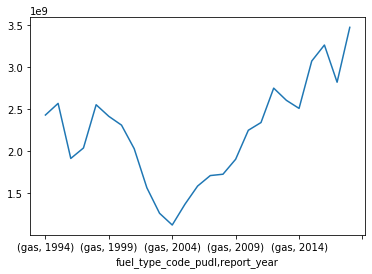

In [124]:
fuel_year_gas['fuel_qty_burned'].plot()

In [120]:
fuel_year_nuclear = fuel_report.groupby(['fuel_type_code_pudl', 'report_year']).sum().iloc[51:75,:]
fuel_year_nuclear

utility_id_ferc1  fuel_qty_burned  \
fuel_type_code_pudl report_year                                      
nuclear             1995                     7074      205408058.0   
                    1996                     3991      148738376.0   
                    1997                     3126      162556374.0   
                    1998                     6084      150463637.0   
                    1999                     6067      144288470.0   
                    2000                     5974      191332015.0   
                    2001                     5006      227524165.0   
                    2002                     4414      191259386.0   
                    2003                     4062      188195311.0   
                    2004                     3098      193995915.0   
                    2005                     3881      178886683.0   
                    2006                     2484      188002318.0   
                    2007                     1738      187613479.0   
                    2008                     1947      168217064.0   
                    2009                     1844      184818649.0   
                    2010                     1844      188680106.0   
                    2011                     2166      173975606.0   
                    2012                     2005      168353395.0   
                    2013                     1844      165677408.0   
                    2014                     2003      177663300.0   
                    2015                     2750      172377064.0   
                    2016                     2602      161091428.0   
                    2017                     2602      168908439.0   
                    2018                     2602      167094541.0   

                                 fuel_mmbtu_per_unit  \
fuel_type_code_pudl report_year                        
nuclear             1995                 1365.809151   
                    1996                 1091.261603   
                    1997                  809.236891   
                    1998                 1716.963500   
                    1999                 1176.120881   
                    2000                 1178.969954   
                    2001                  563.574596   
                    2002                  407.179172   
                    2003                  341.599992   
                    2004                  344.917241   
                    2005                  425.500064   
                    2006                  337.097262   
                    2007                  278.848750   
                    2008                  256.055577   
                    2009                  130.007730   
                    2010                  256.108075   
                    2011                  377.170227   
                    2012                  319.878187   
                    2013                  257.570444   
                    2014                  324.910590   
                    2015                  258.530724   
                    2016                  258.649044   
                    2017                  261.401758   
                    2018                  260.628340   

                                 fuel_cost_per_unit_burned  \
fuel_type_code_pudl report_year                              
nuclear             1995                        384152.639   
                    1996                         66657.887   
                    1997                        112593.911   
                    1998                        117788.269   
                    1999                         62915.808   
                    2000                        112375.382   
                    2001                         59292.078   
                    2002                         59958.884   
                    2003                         59591.536   
                    2004                         61870.002   
           

In [106]:
fuel_year_oil = fuel_report.groupby(['fuel_type_code_pudl', 'report_year']).sum().iloc[76:100,:]
fuel_year_oil

utility_id_ferc1  fuel_qty_burned  \
fuel_type_code_pudl report_year                                      
oil                 1995                    11329         809178.0   
                    1996                    16639        3637754.0   
                    1997                    16116       53849314.0   
                    1998                     6973         543608.0   
                    1999                     4554         640093.0   
                    2000                    42637       23157705.0   
                    2001                    50081       30308989.0   
                    2002                    42150       11179575.0   
                    2003                    49381       32432269.0   
                    2004                    48340       31270099.0   
                    2005                    52791       87834868.0   
                    2006                    48154       54241130.0   
                    2007                    48840       56896019.0   
                    2008                    48014       38187440.0   
                    2009                    45188       17648564.0   
                    2010                    45133       16366891.0   
                    2011                    44109        7172960.0   
                    2012                    44727        5527834.0   
                    2013                    42662        6852942.0   
                    2014                    46777        6968623.0   
                    2015                    37439        6553111.0   
                    2016                    37127        5153004.0   
                    2017                    35929        4296703.0   
                    2018                    33226        5975283.0   

                                 fuel_mmbtu_per_unit  \
fuel_type_code_pudl report_year                        
oil                 1995                  640.517724   
                    1996                  929.977902   
                    1997                  942.374958   
                    1998                  391.821612   
                    1999                  271.954956   
                    2000                 2416.735440   
                    2001                 2751.141748   
                    2002                 2173.726548   
                    2003                 2510.304203   
                    2004                 2503.990496   
                    2005                 2742.263128   
                    2006                 2562.822440   
                    2007                 2597.730709   
                    2008                 2385.913270   
                    2009                 2326.690351   
                    2010                 2363.706526   
                    2011                 2236.419038   
                    2012                 2275.231721   
                    2013                 2124.105319   
                    2014                 2138.865405   
                    2015                 1838.827580   
                    2016                 1675.542769   
                    2017                 1655.582813   
                    2018                 1470.351399   

                                 fuel_cost_per_unit_burned  \
fuel_type_code_pudl report_year                              
oil                 1995                         17858.281   
                    1996                          5357.028   
                    1997                          5387.536   
                    1998                          2608.657   
                    1999                         29654.510   
                    2000                        104055.470   
                    2001                         95315.421   
                    2002                         48956.627   
                    2003                         51349.250   
                    2004                        107669.303   
           

In [118]:
fuel_year_oil.corr()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.439687,0.986267,0.453703,0.207354,0.737575
fuel_qty_burned,0.439687,1.000000,0.505066,-0.042624,-0.161256,0.105016
fuel_mmbtu_per_unit,0.986267,0.505066,1.000000,0.417849,0.175189,0.672937
fuel_cost_per_unit_burned,0.453703,-0.042624,0.417849,1.000000,0.078686,0.436110
fuel_cost_per_unit_delivered,0.207354,-0.161256,0.175189,0.078686,1.000000,0.277949
fuel_cost_per_mmbtu,0.737575,0.105016,0.672937,0.436110,0.277949,1.000000


In [111]:
fuel_year_other = fuel_report.groupby(['fuel_type_code_pudl', 'report_year']).sum().iloc[101:123,:]
fuel_year_other

utility_id_ferc1  fuel_qty_burned  \
fuel_type_code_pudl report_year                                      
other               1995                     1307      422054754.0   
                    1996                      662        1144943.0   
                    1997                     1104        3211371.0   
                    1998                     1504       11577962.0   
                    1999                     1360        2324239.0   
                    2000                     1098        4302104.0   
                    2001                      683         715770.0   
                    2002                      993        1293296.0   
                    2003                      895        1099465.0   
                    2004                      834        2022104.0   
                    2005                      712        2040308.0   
                    2006                      907        2100210.0   
                    2007                      907        1733797.0   
                    2008                      907        1849145.0   
                    2009                     1098        1119167.0   
                    2010                      648        4894168.0   
                    2011                      475        3000340.0   
                    2012                      517        3006978.0   
                    2013                      335        4387423.0   
                    2014                       98        5187094.0   
                    2015                       98        5416122.0   
                    2016                       98        2763596.0   

                                 fuel_mmbtu_per_unit  \
fuel_type_code_pudl report_year                        
other               1995                    2.363363   
                    1996                    0.788831   
                    1997                    1.953651   
                    1998                    2.225648   
                    1999                   83.590448   
                    2000                    2.410105   
                    2001                    0.056907   
                    2002                    0.057613   
                    2003                    0.057861   
                    2004                    0.042442   
                    2005                    0.042440   
                    2006                    0.058244   
                    2007                    0.059376   
                    2008                    0.059582   
                    2009                    0.058667   
                    2010                    0.183067   
                    2011                    0.029524   
                    2012                    0.167199   
                    2013                    0.152937   
                    2014                    0.001414   
                    2015                    0.001411   
                    2016                    0.001410   

                                 fuel_cost_per_unit_burned  \
fuel_type_code_pudl report_year                              
other               1995                           183.577   
                    1996                           160.075   
                    1997                           153.923   
                    1998                           225.428   
                    1999                           271.579   
                    2000                           100.014   
                    2001                            71.283   
                    2002                            -4.257   
                    2003                           -51.286   
                    2004                           174.796   
                    2005                            76.196   
                    2006                           190.904   
                    2007                           143.112   
                    2008                           211.940   
               

In [117]:
fuel_year_other.corr()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.294107,0.350699,0.456820,0.469672,0.284726
fuel_qty_burned,0.294107,1.000000,-0.025602,0.117289,0.105757,-0.191948
fuel_mmbtu_per_unit,0.350699,-0.025602,1.000000,0.320116,0.264290,-0.161737
fuel_cost_per_unit_burned,0.456820,0.117289,0.320116,1.000000,0.952850,-0.045648
fuel_cost_per_unit_delivered,0.469672,0.105757,0.264290,0.952850,1.000000,0.044504
fuel_cost_per_mmbtu,0.284726,-0.191948,-0.161737,-0.045648,0.044504,1.000000


In [115]:
fuel_year_waste = fuel_report.groupby(['fuel_type_code_pudl', 'report_year']).sum().iloc[123:150,:]
fuel_year_waste

utility_id_ferc1  fuel_qty_burned  \
fuel_type_code_pudl report_year                                      
waste               1994                     3508        1242241.0   
                    1995                     3346        1642051.0   
                    1996                     3162        1102632.0   
                    1997                     3325        1528774.0   
                    1998                     3053        1624599.0   
                    1999                     2167        1108979.0   
                    2000                     2175        1271108.0   
                    2001                     2236        1361951.0   
                    2002                     2218        1394020.0   
                    2003                     1856        1082223.0   
                    2004                     2343        1110020.0   
                    2005                     2223        1605762.0   
                    2006                     2956        1828512.0   
                    2007                     2675        2153725.0   
                    2008                     2498        2147651.0   
                    2009                     3357        2139046.0   
                    2010                     3142        2423293.0   
                    2011                     2953        2169002.0   
                    2012                     2727        2064520.0   
                    2013                     3422        2723547.0   
                    2014                     2840        3607257.0   
                    2015                     2837        3737472.0   
                    2016                     2547        3782403.0   
                    2017                     2183        3534230.0   
                    2018                     2277        3296373.0   

                                 fuel_mmbtu_per_unit  \
fuel_type_code_pudl report_year                        
waste               1994                    0.577288   
                    1995                    0.337080   
                    1996                    0.364899   
                    1997                    0.382760   
                    1998                    0.221197   
                    1999                    0.186733   
                    2000                    0.152991   
                    2001                    0.160667   
                    2002                    8.665753   
                    2003                    8.818894   
                    2004                    8.667558   
                    2005                    8.653393   
                    2006                    8.685188   
                    2007                    8.676567   
                    2008                    8.663653   
                    2009                    8.700041   
                    2010                    8.675162   
                    2011                    8.662519   
                    2012                    8.762649   
                    2013                    8.775048   
                    2014                    8.715213   
                    2015                    8.738479   
                    2016                    8.828807   
                    2017                    8.686320   
                    2018                    8.693921   

                                 fuel_cost_per_unit_burned  \
fuel_type_code_pudl report_year                              
waste               1994                            52.762   
                    1995                          -192.699   
                    1996                            88.092   
                    1997                           137.433   
                    1998                           238.109   
                    1999                           143.025   
                    2000                          -489.141   
                    2001                           217.499   
         